# House Prices - Advanced Regression Techniques
(Preços de casas - Técnicas Avançadas de Regressão)

<img src="https://github.com/lucaslealx/HousePrices/blob/main/img/img1.png?raw=true\" width=800>


- Vamos utilizar o [dataset disponível no Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)
    - É um dataset de **competição**
    - Temos uma base com a **descrição de cada uma das colunas (data_description.txt)**

In [1]:
# Importando as bases
import pandas as pd
treino = pd.read_csv('train_3_2.csv')
teste = pd.read_csv('test_3_2.csv')

In [2]:
# Verificando o formato da base
treino.shape

(1460, 146)

In [3]:
# Verificando o tipo de dados nas colunas
treino.dtypes.value_counts()

int64      133
float64     13
Name: count, dtype: int64

- Precisamos garantir que não vamos ter colunas de tex|to

In [4]:
# Selecionando apenas as colunas numéricas
cols_nr = treino.columns[treino.dtypes != 'object']
cols_nr[cols_nr != 'SalePrice']

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandSlope',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       ...
       'Fence_MnPrv', 'Fence_infrequent_sklearn',
       'MiscFeature_infrequent_sklearn', 'SaleType_New', 'SaleType_WD',
       'SaleType_infrequent_sklearn', 'SaleCondition_Abnorml',
       'SaleCondition_Normal', 'SaleCondition_Partial',
       'SaleCondition_infrequent_sklearn'],
      dtype='object', length=145)

In [5]:
# E criar uma nova base com esses valores
treino = treino.loc[:,cols_nr]
treino.shape

(1460, 146)

In [6]:
# Mantendo também apenas as colunas numéricas para a base de teste (que não possui SalePrice)
teste = teste.loc[:,cols_nr[cols_nr != 'SalePrice']]
teste.shape

(1459, 145)

## Criando nosso modelo

- **Vamos separar em treino e teste**
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [7]:
# Selecionando X e y
X = treino.drop('SalePrice',axis=1)
y = treino.SalePrice

In [8]:
# Importando o train_test_split
from sklearn.model_selection import train_test_split

In [9]:
# Separando essa base em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

- **Vamos então adicionar novos algoritmos nessa análise:**
    - Regressão Linear
        - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
    - RandomForestRegressor
        - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor
    - XGBoost
        - https://xgboost.readthedocs.io/en/stable/index.html

In [10]:
# Importando a regressão linear
from sklearn.linear_model import LinearRegression

In [11]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_rl = LinearRegression().fit(X_train, y_train)

In [12]:
# Fazendo a previsão pros dados de teste
y_pred_rl = reg_rl.predict(X_test)

In [13]:
# Importando o Random Forest
from sklearn.ensemble import RandomForestRegressor

In [14]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_rf = RandomForestRegressor(random_state=42).fit(X_train, y_train)

In [15]:
# Fazendo a previsão
y_pred_rf = reg_rf.predict(X_test)

In [16]:
# Instalando o XGBoost
# !pip install xgboost

In [17]:
# Importando o XGBoost
from xgboost import XGBRegressor

ModuleNotFoundError: No module named 'xgboost'

In [18]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_xgb = XGBRegressor(random_state=42).fit(X_train, y_train)

In [19]:
# Fazendo a previsão
y_pred_xgb = reg_xgb.predict(X_test)

- **E avaliar esses dados, utilizando tanto o erro absoluto quanto o quadrático:**
    - Erro médio absoluto
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
    - Erro quadrático médio
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [18]:
# Importando o erro médio absoluto
from sklearn.metrics import mean_absolute_error

In [19]:
# E o erro quadrático médio
from sklearn.metrics import mean_squared_error

In [20]:
# Avaliando o erro da regressão
print(mean_absolute_error(y_test, y_pred_rl))
print(mean_squared_error(y_test, y_pred_rl))

22157.115236188012
1539851963.9372878


In [21]:
# do Random Forest
print(mean_absolute_error(y_test, y_pred_rf))
print(mean_squared_error(y_test, y_pred_rf))

17821.686556016597
1006122691.6915648


In [24]:
# e do xgb
print(mean_absolute_error(y_test, y_pred_xgb))
print(mean_squared_error(y_test, y_pred_xgb))

18781.560044411308
1128077749.7427084


- **Podemos plotar visualmente a relação do y_test com as previsões feitas**
    - Para isso vamos utilizar o matplotlib
        - https://matplotlib.org/

In [25]:
# Importando o matplotlib
import matplotlib.pyplot as plt

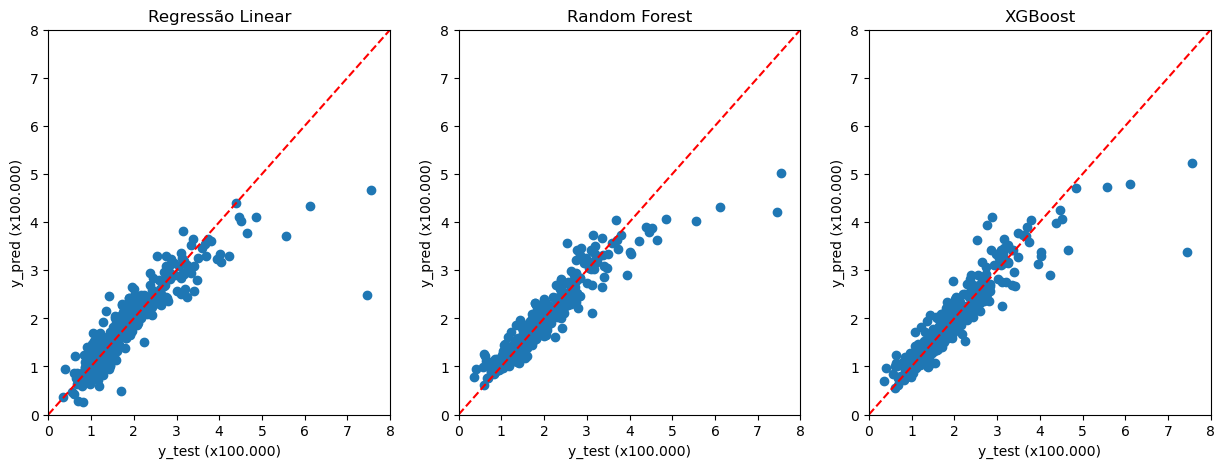

In [26]:
# Criando esse gráfico
fig, ax = plt.subplots(ncols=3,figsize=(15,5))

ax[0].scatter(y_test/100000, y_pred_rl/100000)
ax[0].plot([0,8],[0,8],'--r')
ax[1].scatter(y_test/100000, y_pred_rf/100000)
ax[1].plot([0,8],[0,8],'--r')
ax[2].scatter(y_test/100000, y_pred_xgb/100000)
ax[2].plot([0,8],[0,8],'--r')

ax[0].set(xlim=(0, 8),ylim=(0, 8))
ax[0].set_xlabel('y_test (x100.000)')
ax[0].set_ylabel('y_pred (x100.000)')
ax[0].set_title('Regressão Linear')
ax[1].set(xlim=(0, 8),ylim=(0, 8))
ax[1].set_xlabel('y_test (x100.000)')
ax[1].set_ylabel('y_pred (x100.000)')
ax[1].set_title('Random Forest')
ax[2].set(xlim=(0, 8),ylim=(0, 8))
ax[2].set_xlabel('y_test (x100.000)')
ax[2].set_ylabel('y_pred (x100.000)')
ax[2].set_title('XGBoost')

plt.show()

## Fazendo a previsão para a base de teste da competição

In [22]:
# Visualizando a base
teste.head(3)

,Id,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,Fence_MnPrv,Fence_infrequent_sklearn,MiscFeature_infrequent_sklearn,SaleType_New,SaleType_WD,SaleType_infrequent_sklearn,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_infrequent_sklearn
0,1461,20,80.0,11622,3,0,5,6,1961,1961,...,1,0,0,0,1,0,0,1,0,0
1,1462,20,81.0,14267,2,0,6,6,1958,1958,...,0,0,1,0,1,0,0,1,0,0
2,1463,60,74.0,13830,2,0,5,5,1997,1998,...,1,0,0,0,1,0,0,1,0,0


In [23]:
# Vamos usar a Random Forest para fazer a previsão
y_pred = reg_rf.predict(teste)

In [24]:
# Podemos adicionar essa coluna de previsão na nossa base
teste['SalePrice'] = y_pred

In [25]:
# E extrair somente o Id e o SalePrice
base_kaggle = teste[['Id','SalePrice']]
base_kaggle.head(3)

,Id,SalePrice
0,1461,122889.75
1,1462,148248.50
2,1463,190463.51


In [26]:
# Podemos então exportar essa base
base_kaggle.to_csv('resultado4_2.csv',index=False)